In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed May 11 17:11:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

We will first demonstrate how to use the `score` function in `bert_score`, which is what you need to evaluate a set of machine generated outputs.

In [ ]:
pip install transformers

In [ ]:
pip install bert_score

In [ ]:
from bert_score import score

In [ ]:
# cloning the repo because we need to get some example data
!git clone https://github.com/Tiiiger/bert_score.git

fatal: destination path 'bert_score' already exists and is not an empty directory.


Inputs to `score` are a list of candidate sentences and a list of reference sentences. 

In [ ]:
with open("/content/drive/MyDrive/training-monolingual-nc-v13/news-commentary-v13.cs") as f:
    cands = [line.strip() for line in f]

with open("/content/drive/MyDrive/training-monolingual-nc-v13/news-commentary-v13.en") as f:
    refs = [line.strip() for line in f]

Let's have a look.

In [ ]:
cands = cands[0:10000]
refs = refs[0:10000]

We are now ready to call the score function. Besides candidates and references, we need to speicify the bert model we are using. Since we are dealing with English sentences, we will use the default English model, which is *roberta-large* model.

In [ ]:
# When you are running this cell for the first time, 
# it will download the RoBERTa model which will take relatively longer. 
P, R, F1 = score(cands, refs, 'roberta-base', verbose=True)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.


  0%|          | 0/313 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/157 [00:00<?, ?it/s]

done in 65.87 seconds, 151.82 sentences/sec


The outputs of the `score` function are Tensors of precision, recall, and F1 respectively. Each Tensor has the same number of items with the candidate and reference lists. Each item in the list is a scalar, representing the score for the corresponding candidates and references.

In [ ]:
F1

tensor([0.8253, 0.7908, 0.7576,  ..., 0.7497, 0.7543, 0.7330])

We can take the average of all candidate reference pairs to be the system level score.

In [ ]:
print(f"System level F1 score: {F1.mean():.3f}")
print(f"System level P score: {P.mean():.3f}")
print(f"System level R score: {R.mean():.3f}")

System level F1 score: 0.746
System level P score: 0.712
System level R score: 0.785


It might also be very interestig to see the distribution of BERTScore.

In [ ]:
import matplotlib.pyplot as plt

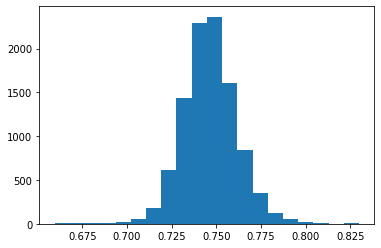

In [ ]:
plt.hist(F1, bins=20)
plt.show()

`bert_score` also provides a convenient function `plot_example` to support sentence-level visualization by plotting th e pairwise cosine similarity. Note that here we have not applied the idf weighting.